In [ ]:
!pip install opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=fcc64845a990ec6228c3d6d1d01b138f152fc0eae09b7e0ffc12d9c1f3b29ae4
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [ ]:
import opensmile
import pandas as pd

In [ ]:
smile = opensmile.Smile(
    #received deprecate warning for GeMAPS w/ recommendation to use GeMAPSv01b
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

In [ ]:
import audiofile

Opensmile has 3 level of features:

*   LowLevelDescriptors - low-level descriptors (LLD) calculated over a sliding
*   LowLevelDescriptors_Deltas - Delta regression of LLDs
*  Functionals - statistical functionals mapping variable series of LLDs to static values

In the past, I used Functionals where one value was output per file.

But as we want feature values every X seconds, we'll use LLD features

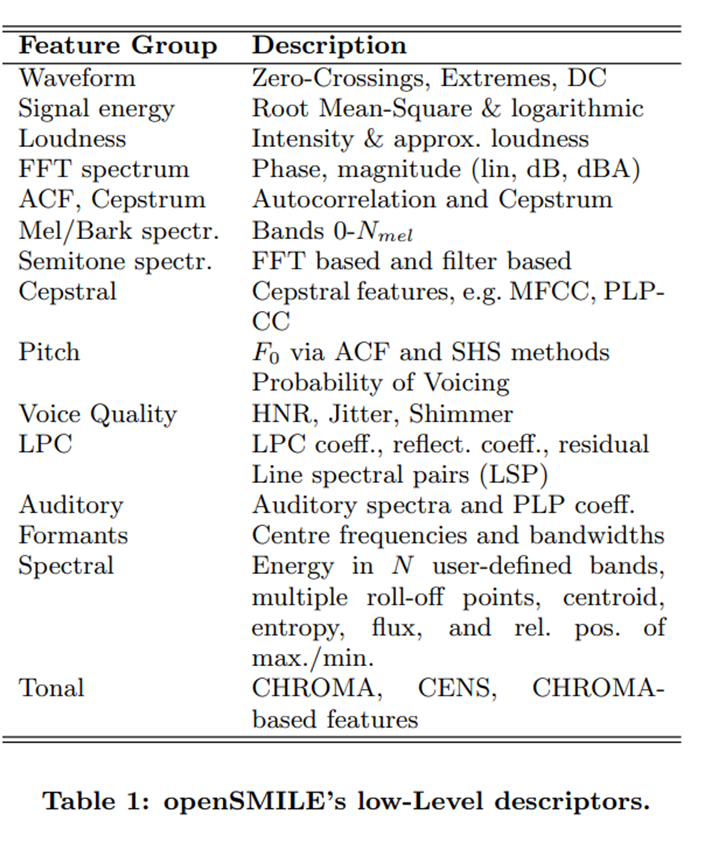

#Generalization

In [ ]:
def output_multiple_of_100(arr):
    num_elements = len(arr)
    output_size = (num_elements // 100) * 100
    output_array = arr[:output_size]
    return output_array

In [ ]:
import audiofile


In [ ]:
def deriveOpensmileFeatures(input_audio_file):
  import opensmile
  import pandas as pd
  derivedFeatures =[]
  signal, sampling_rate = audiofile.read(
    input_audio_file,
    #duration=10,
    always_2d=True,
   )
  lldFeatureSets = [opensmile.FeatureSet.ComParE_2016,opensmile.FeatureSet.eGeMAPSv02,opensmile.FeatureSet.emobase]
  for featureSet in lldFeatureSets:
    smile = opensmile.Smile(
      feature_set=featureSet,
      feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
    )
    df = smile.process_signal(
      signal,
      sampling_rate
    )
    #print(df.shape)
    dfArray = output_multiple_of_100(df.to_numpy())
    #print(dfArray.shape)
    reshaped_array = dfArray.reshape(-1, 100, dfArray.shape[1])
    averaged_array = reshaped_array.mean(axis=1)
    columns = df.columns  # Assuming you want to keep the same columns
    resampledDF = pd.DataFrame(averaged_array, columns=columns)
    derivedFeatures.append(resampledDF)
  #repeat with LLD_Deltas
  lldDeltasFeatureSets = [opensmile.FeatureSet.ComParE_2016,opensmile.FeatureSet.emobase]
  for featureSet in lldDeltasFeatureSets:
    smile = opensmile.Smile(
      feature_set=featureSet,
      feature_level=opensmile.FeatureLevel.LowLevelDescriptors_Deltas,
    )
    df = smile.process_signal(
      signal,
      sampling_rate
    )
    dfArray = output_multiple_of_100(df.to_numpy())
    reshaped_array = dfArray.reshape(-1, 100, dfArray.shape[1])
    averaged_array = reshaped_array.mean(axis=1)
    columns = df.columns  # Assuming you want to keep the same columns
    resampledDF = pd.DataFrame(averaged_array, columns=columns)
    derivedFeatures.append(resampledDF)
  derivedFeatures = pd.concat(derivedFeatures,axis=1)
  #derivedFeatures.to_csv('AcousticFeatures_' + input_audio_file + '.csv')
  return derivedFeatures

In [ ]:
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
acousticFeaturesSept9DF = deriveOpensmileFeatures('noModeratorSpeech_aDBS012_2022-09-09_audio_amplitude.wav.wav')
acousticFeaturesSept9DF.to_csv('AcousticFeatures_' + 'noModeratorSpeech_aDBS012_2022-09-09_audio_amplitude.csv')

In [ ]:
acousticFeaturesSept19DF = deriveOpensmileFeatures('noModeratorSpeech_aDBS012_2022-09-19_audio_amplitude.wav.wav')
acousticFeaturesSept19DF.to_csv('AcousticFeatures_' + 'noModeratorSpeech_aDBS012_2022-09-19_audio_amplitude.csv')

In [ ]:
acousticFeaturesNov15DF = deriveOpensmileFeatures('noModeratorSpeech_aDBS012_2022-11-15_audio_amplitude.wav.wav')
acousticFeaturesNov15DF.to_csv('AcousticFeatures_' + 'noModeratorSpeech_aDBS012_2022-11-15_audio_amplitude.csv')

In [ ]:
acousticFeaturesOct4DF = deriveOpensmileFeatures('noModeratorSpeech_aDBS012_2022_10_04_audio_amplitude.wav.wav')
acousticFeaturesOct4DF.to_csv('AcousticFeatures_' + 'noModeratorSpeech_aDBS012_2022_10_04_audio_amplitude.csv')

In [ ]:
acousticFeaturesOct4DF.shape

(1107, 207)

Reminder: download .csv files

In [ ]:
acousticFeaturesFeb27Experiment1DF = deriveOpensmileFeatures('noModeratorSpeech_aDBS012_2023-02-27_Experiment1_audio_amplitude.wav')
acousticFeaturesFeb27Experiment1DF.to_csv('AcousticFeatures_' + 'noModeratorSpeech_aDBS012_2023-02-27_Experiment1_audio_amplitude.csv')

In [ ]:
acousticFeaturesFeb27Experiment1DF.shape

(381, 207)

In [ ]:
acousticFeaturesFeb27Experiment5DF = deriveOpensmileFeatures('noModeratorSpeech_aDBS012_2023-02-27_Experiment5_audio_amplitude.wav')
acousticFeaturesFeb27Experiment5DF.to_csv('AcousticFeatures_' + 'noModeratorSpeech_aDBS012_2023-02-27_Experiment5_audio_amplitude.csv')

In [ ]:
acousticFeaturesFeb27Experiment5DF.shape

(365, 207)